# Analysing Housing Prices in Brampton

## Group 7:

   - Harsh Dave (0792707)  
   - Harshil Patel (0824962)
   - Tirth Shah (0824760)
   - Priyam Mistry (0831284)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
housingData=pd.read_csv('FinalCSV.csv')
housingData = pd.DataFrame(housingData)

# Cleaning The Dataset

In [3]:
# Finding Null Values
housingData.isnull().sum()

#                     0
LSC                   0
EC                 1198
St#                   0
Street Name           0
Abbr                  3
Municipality          0
Community             0
List Price            0
Sold Price            0
Type                  0
Style                 0
Br                    2
+                   257
Wr                    1
Fam                   1
Kit                   0
Gar Type              0
A/C                   0
Heat                  0
Contract Date         0
Sold Date             0
List Brokerage        0
Co-Op Brokerage       0
MLS#                  0
dtype: int64

In [4]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                1435 non-null   int64  
 1   LSC              1435 non-null   object 
 2   EC               237 non-null    object 
 3   St#              1435 non-null   int64  
 4   Street Name      1435 non-null   object 
 5   Abbr             1432 non-null   object 
 6   Municipality     1435 non-null   object 
 7   Community        1435 non-null   object 
 8   List Price       1435 non-null   object 
 9   Sold Price       1435 non-null   object 
 10  Type             1435 non-null   object 
 11  Style            1435 non-null   object 
 12  Br               1433 non-null   float64
 13  +                1178 non-null   float64
 14  Wr               1434 non-null   float64
 15  Fam              1434 non-null   object 
 16  Kit              1435 non-null   int64  
 17  Gar Type      

In [5]:
# Filling the NULL vaues, removing special sign and change type to int64
housingData['List Price'] = housingData['List Price'].fillna(0)
housingData['List Price'] = housingData['List Price'].astype(str).str.replace('\$', '', regex=True)
housingData['List Price'] = housingData['List Price'].astype(str).str.replace(',', '', regex=True)
housingData['List Price'] = housingData['List Price'].astype(str).str.replace('.', '', regex=True)
housingData['List Price'] = housingData['List Price'].astype('int64')

In [6]:
# Filling the NULL vaues, removing special sign and change type to int64
housingData['Sold Price'] = housingData['Sold Price'].fillna(0)
housingData['Sold Price'] = housingData['Sold Price'].astype(str).str.replace('\$', '', regex=True)
housingData['Sold Price'] = housingData['Sold Price'].astype(str).str.replace(',', '', regex=True)
housingData['Sold Price'] = housingData['Sold Price'].astype(str).str.replace('.', '', regex=True)
housingData['Sold Price'] = housingData['Sold Price'].astype('int64')

In [7]:
# Filling the NULL vaues and change type to int64
housingData['Br'] = housingData['Br'].fillna(0)
housingData['Br'] = housingData['Br'].astype('int64')

In [8]:
# Filling the NULL vaues and change type to int64
housingData['+'] = housingData['+'].fillna(0)
housingData['+'] = housingData['+'].astype('int64')

In [9]:
# Filling the NULL vaues and change type to int64
housingData['Wr'] = housingData['Wr'].fillna(0)
housingData['Wr'] = housingData['Wr'].astype('int64')

In [10]:
# Filling the NULL vaues and change type to int64
housingData['Kit'] = housingData['Kit'].fillna(0)
housingData['Kit'] = housingData['Kit'].astype('int64')

In [11]:
# Convert object type to date type for 'Contract Date' and 'Sold Date' feature
housingData['Contract Date'] = pd.to_datetime(housingData['Contract Date'], errors='coerce')
housingData['Sold Date'] = pd.to_datetime(housingData['Sold Date'], errors='coerce')

In [12]:
# Fill NULL values for 'Fam' feature
housingData['Fam'] = housingData['Fam'].fillna('N')

In [13]:
# Change the values of the 'Community' feature.

housingData['Community'] = housingData['Community'].replace('Vales of C', 'Vales of Caclemore')
housingData['Community'] = housingData['Community'].replace('Vales of', 'Vales of Caclemore')
housingData['Community'] = housingData['Community'].replace('Vales', 'Vales of Caclemore')
housingData['Community'] = housingData['Community'].replace('Credit', 'Credit Valley')
housingData['Community'] = housingData['Community'].replace('Credit Val', 'Credit Valley')
housingData['Community'] = housingData['Community'].replace('Central Pa', 'Central Park')
housingData['Community'] = housingData['Community'].replace("Fletcher's", "Fletcher's Creek")
housingData['Community'] = housingData['Community'].replace("Gore Indus", "Gore Industrial")
housingData['Community'] = housingData['Community'].replace('Queen Stre', 'Queen Street')
housingData['Community'] = housingData['Community'].replace('Bram East', 'Brampton E')
housingData['Community'] = housingData['Community'].replace('Bram West', 'Brampton W')
housingData['Community'] = housingData['Community'].replace('Sandringha', 'Sandringham')
housingData['Community'] = housingData['Community'].replace('Downtown B', 'Downtown Brampton')

In [14]:
# Change the values of the 'Style' feature.

housingData['Style'] = housingData['Style'].replace('2 1/2 Stor', '2 1/2 Storey')
housingData['Style'] = housingData['Style'].replace('2 1/2', '2 1/2 Storey')
housingData['Style'] = housingData['Style'].replace('Bungalow-F', 'Bungalow-Raised')
housingData['Style'] = housingData['Style'].replace('Bungalow-R', 'Bungalow-Raised')

In [15]:
# Remove features which are in no use
housingData = housingData.drop(columns=['EC'])
housingData = housingData.drop(columns=['Abbr'])
housingData = housingData.drop(columns=['Co-Op Brokerage'])

In [16]:
# Renaming the feature name.
new_column_names = {
    'LSC': 'Listing Class',
    'St#': 'Street Number',
    'Wr': 'Wash Room',
    'Br': 'Bed Room',
    '+': 'Extra Space',
    'Fam': 'Family Room',
    'Kit': 'Kitchen',
    'Gar Type': 'Garage Type',
    'Heat': 'Heat Type',
    'MLS#': 'Listing ID'
}

housingData = housingData.rename(columns=new_column_names)


In [17]:
# Changing the order of the 'Listing ID' as it is the unique feature in the dataset.
new_column_order = ['#', 'Listing ID'] + [col for col in housingData.columns if col not in ['#', 'Listing ID']]
housingData = housingData[new_column_order]

In [18]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   #               1435 non-null   int64         
 1   Listing ID      1435 non-null   object        
 2   Listing Class   1435 non-null   object        
 3   Street Number   1435 non-null   int64         
 4   Street Name     1435 non-null   object        
 5   Municipality    1435 non-null   object        
 6   Community       1435 non-null   object        
 7   List Price      1435 non-null   int64         
 8   Sold Price      1435 non-null   int64         
 9   Type            1435 non-null   object        
 10  Style           1435 non-null   object        
 11  Bed Room        1435 non-null   int64         
 12  Extra Space     1435 non-null   int64         
 13  Wash Room       1435 non-null   int64         
 14  Family Room     1435 non-null   object        
 15  Kitc

In [19]:
# Checking if there is any NULL values in the dataset after the cleaning.
housingData.isnull().sum()

#                 0
Listing ID        0
Listing Class     0
Street Number     0
Street Name       0
Municipality      0
Community         0
List Price        0
Sold Price        0
Type              0
Style             0
Bed Room          0
Extra Space       0
Wash Room         0
Family Room       0
Kitchen           0
Garage Type       0
A/C               0
Heat Type         0
Contract Date     0
Sold Date         0
List Brokerage    0
dtype: int64

In [20]:
# Checking if there is any duplicate record.
housingData.duplicated().sum()

0

In [21]:
housingData.describe().T

,count,mean,std,min,25%,50%,75%,max
#,1435.0,7.180000e+02,414.393131,1.0,359.5,718.0,1076.5,1435.0
Street Number,1435.0,6.061742e+01,253.473439,1.0,15.0,32.0,65.0,9191.0
List Price,1435.0,1.288314e+06,272081.604677,699900.0,1099000.0,1285000.0,1399999.0,2999900.0
Sold Price,1435.0,1.354143e+06,257486.026393,710000.0,1177843.0,1332000.0,1500000.0,2625000.0
Bed Room,1435.0,3.720557e+00,0.611913,0.0,3.0,4.0,4.0,6.0
Extra Space,1435.0,1.097561e+00,0.932275,0.0,0.0,1.0,2.0,5.0
Wash Room,1435.0,3.818118e+00,0.927470,0.0,3.0,4.0,4.0,8.0
Kitchen,1435.0,1.020209e+00,0.145634,0.0,1.0,1.0,1.0,2.0


In [22]:
# Creating new csv file with the cleaned dataset tobe used in Tableau for the visulization
output_csv_path = 'housingData.csv'
housingData.to_csv(output_csv_path, index=False)

# Exploratory Data Analysis (EDA)

# Univariate Analysis For Categorical Variables

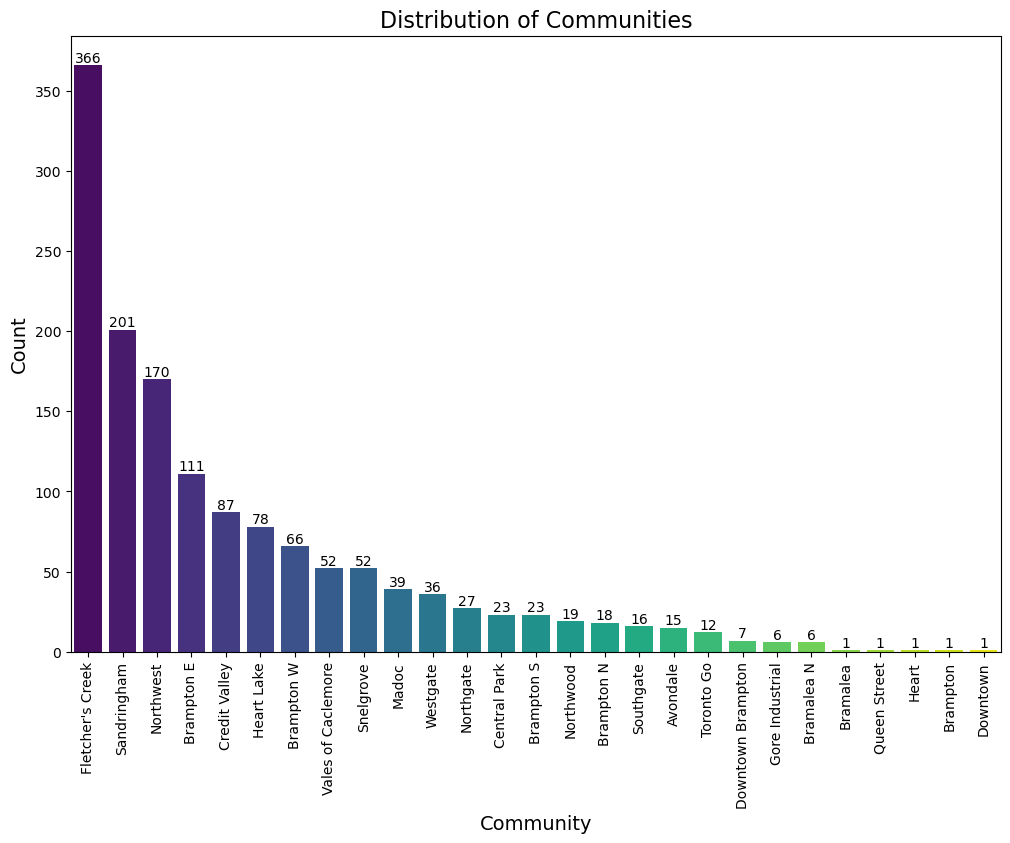

In [24]:
# Distribution of Communities

community_counts = housingData['Community'].value_counts()

color_palette = sns.color_palette('viridis', len(community_counts))

sorted_communities = community_counts.index

plt.figure(figsize=(12, 8))
ax = sns.countplot(x=housingData['Community'], order=sorted_communities, palette=color_palette)

for i, bar in enumerate(ax.patches):
    count = community_counts[sorted_communities[i]]
    bar.set_height(count)
    bar.set_facecolor(color_palette[i])
    
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Distribution of Communities', fontsize=16)
ax.set_xlabel('Community', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10)

plt.show()


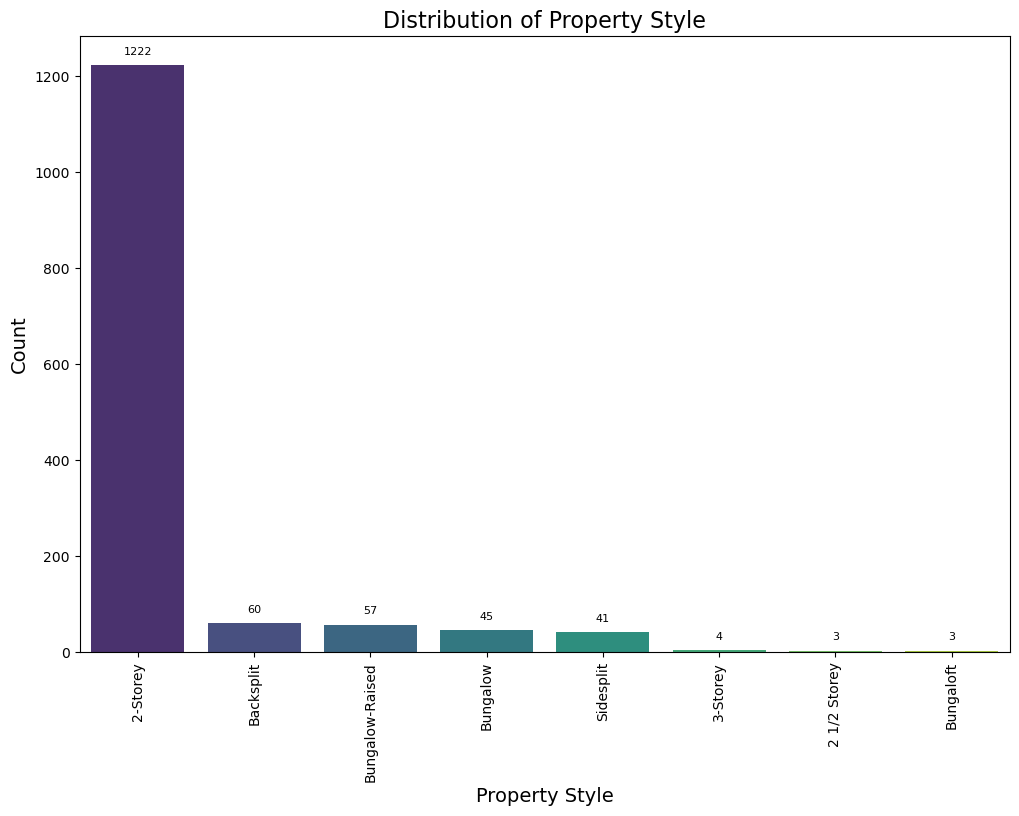

In [25]:
# Distribution of Property Style

plt.figure(figsize=(12, 8))

ax = sns.countplot(x=housingData['Style'], palette='viridis', order=housingData['Style'].value_counts().index)
ax.set_title('Distribution of Property Style', fontsize=16)
ax.set_xlabel('Property Style', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()


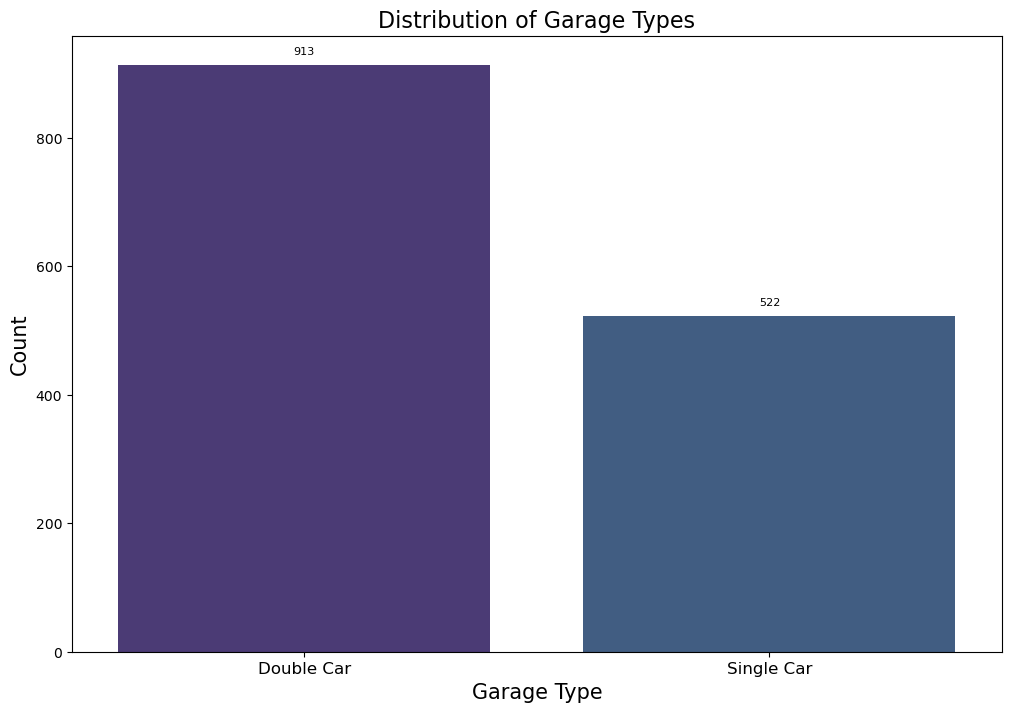

In [26]:
# Distribution of Garage Types

plt.figure(figsize=(12, 8))

color_palette = sns.color_palette('viridis')


ax = sns.countplot(x='Garage Type', data=housingData, palette=color_palette)
ax.set_title('Distribution of Garage Types', fontsize=16)
ax.set_xlabel('Garage Type', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()


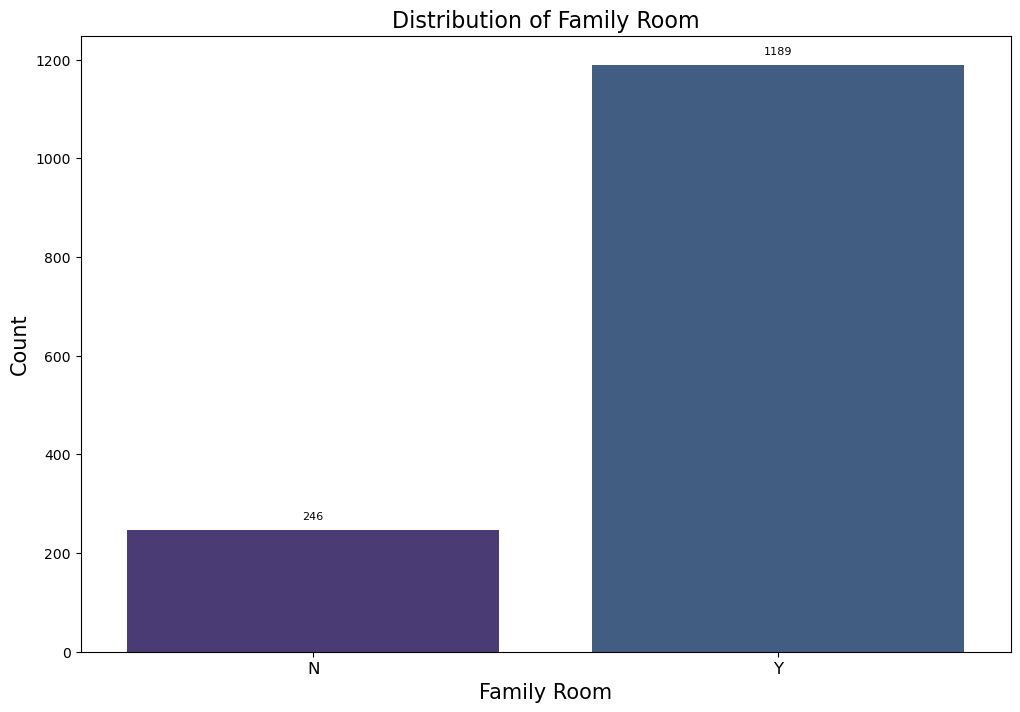

In [27]:
# Distribution of Family Room

plt.figure(figsize=(12, 8))

color_palette = sns.color_palette('viridis')

ax = sns.countplot(x=housingData['Family Room'], palette=color_palette)
ax.set_title('Distribution of Family Room', fontsize=16)
ax.set_xlabel('Family Room', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

# Univariate Analysis For Numerical Variables

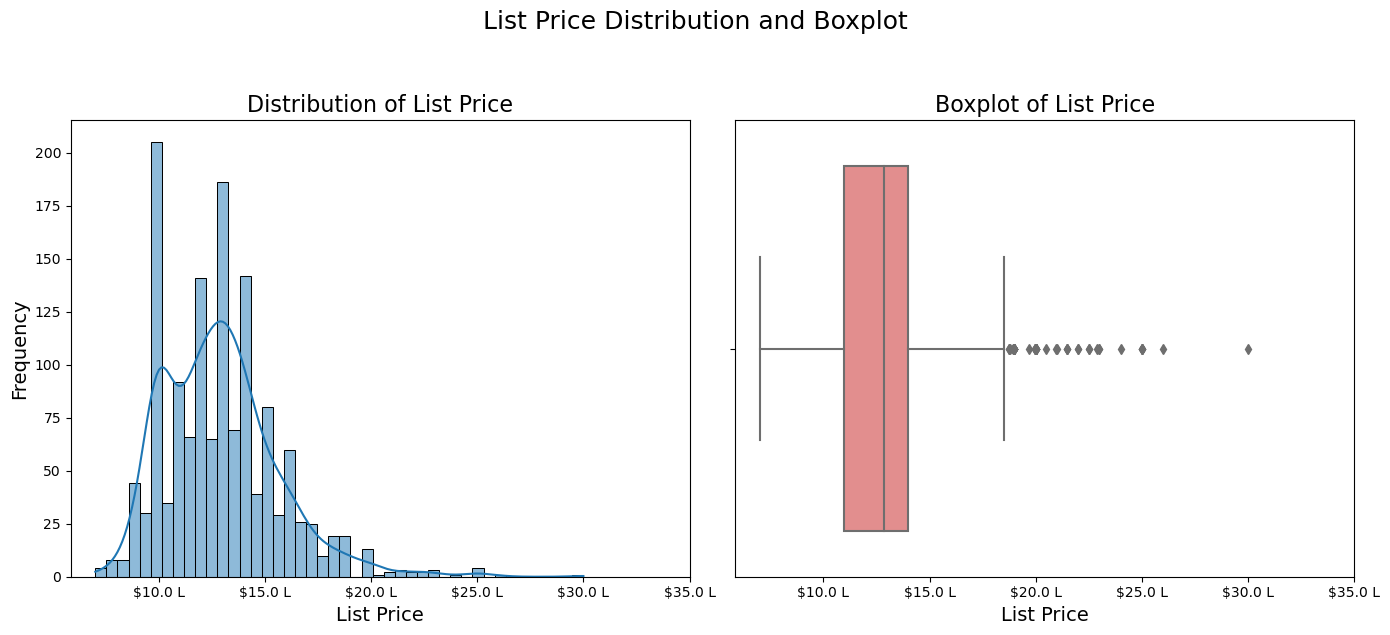

In [28]:
# Distribution of List Price

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
histplot = sns.histplot(housingData['List Price'], kde=True, edgecolor='black')
plt.title('Distribution of List Price', fontsize=16)
plt.xlabel('List Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


xticks = histplot.get_xticks()
xticklabels = [f'${x/100000:.1f} L' for x in xticks[1:]]
histplot.set_xticks(xticks[1:])
histplot.set_xticklabels(xticklabels)

plt.subplot(1, 2, 2)
boxplot = sns.boxplot(x=housingData['List Price'], color='lightcoral')
plt.title('Boxplot of List Price', fontsize=16)
plt.xlabel('List Price', fontsize=14)

xticks = boxplot.get_xticks()
xticklabels = [f'${x/100000:.1f} L' for x in xticks[1:]]
boxplot.set_xticks(xticks[1:])
boxplot.set_xticklabels(xticklabels)

plt.suptitle('List Price Distribution and Boxplot', fontsize=18, y=1.05)
plt.tight_layout()

plt.show()


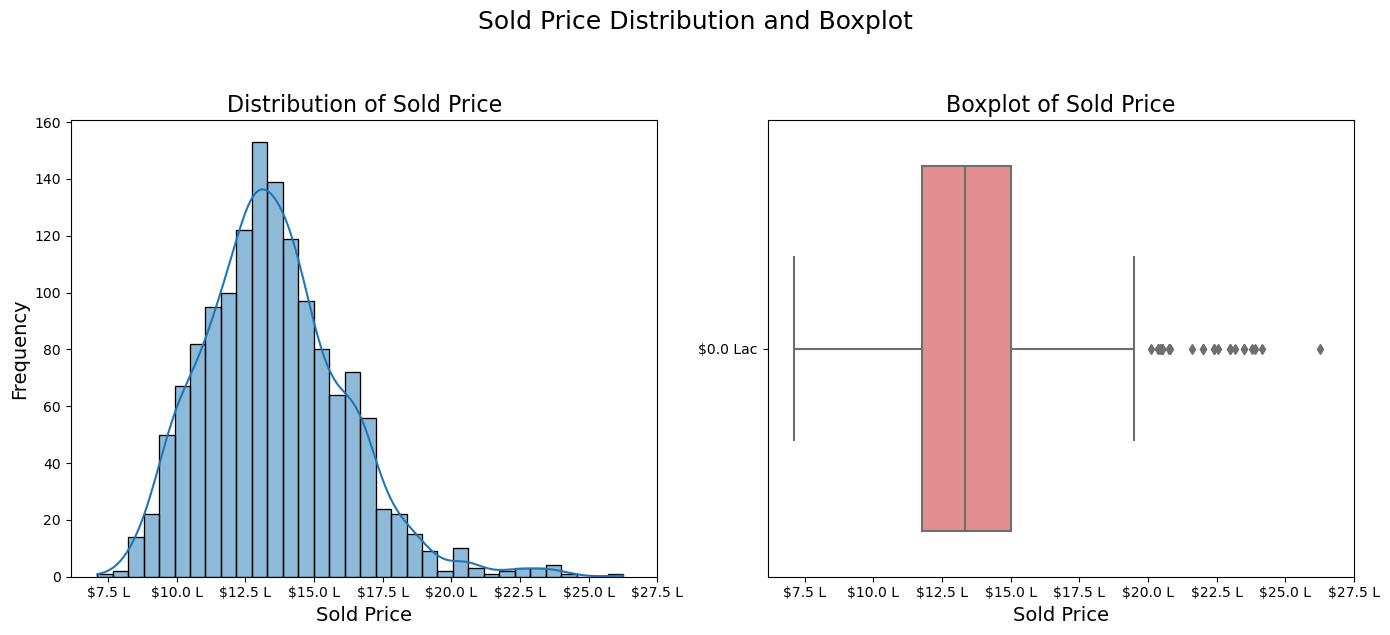

In [29]:
# Sold Price Distribution and Boxplot

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
histplot = sns.histplot(housingData['Sold Price'], kde=True, edgecolor='black')
plt.title('Distribution of Sold Price', fontsize=16)
plt.xlabel('Sold Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

xticks = histplot.get_xticks()
xticklabels = [f'${x/100000:.1f} L' for x in xticks[1:]]
histplot.set_xticks(xticks[1:])
histplot.set_xticklabels(xticklabels)

plt.subplot(1, 2, 2)
boxplot = sns.boxplot(x=housingData['Sold Price'], color='lightcoral')
plt.title('Boxplot of Sold Price', fontsize=16)
plt.xlabel('Sold Price', fontsize=14)

xticks = boxplot.get_xticks()
xticklabels = [f'${x/100000:.1f} L' for x in xticks[1:]]
boxplot.set_xticks(xticks[1:])
boxplot.set_xticklabels(xticklabels)

boxplot.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/100000:.1f} Lac'))

plt.suptitle('Sold Price Distribution and Boxplot', fontsize=18, y=1.05)
plt.tight_layout()

plt.show()


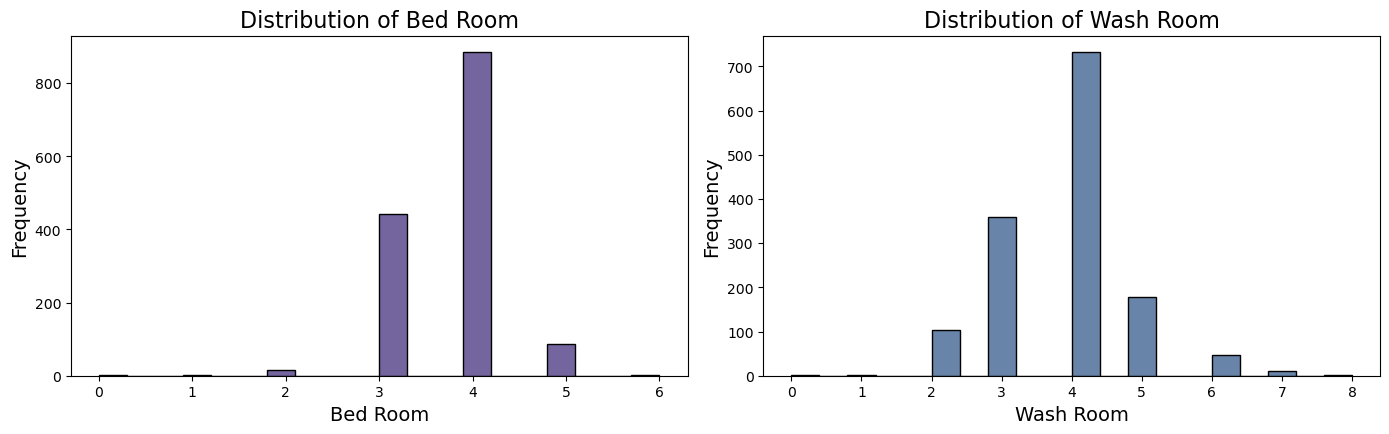

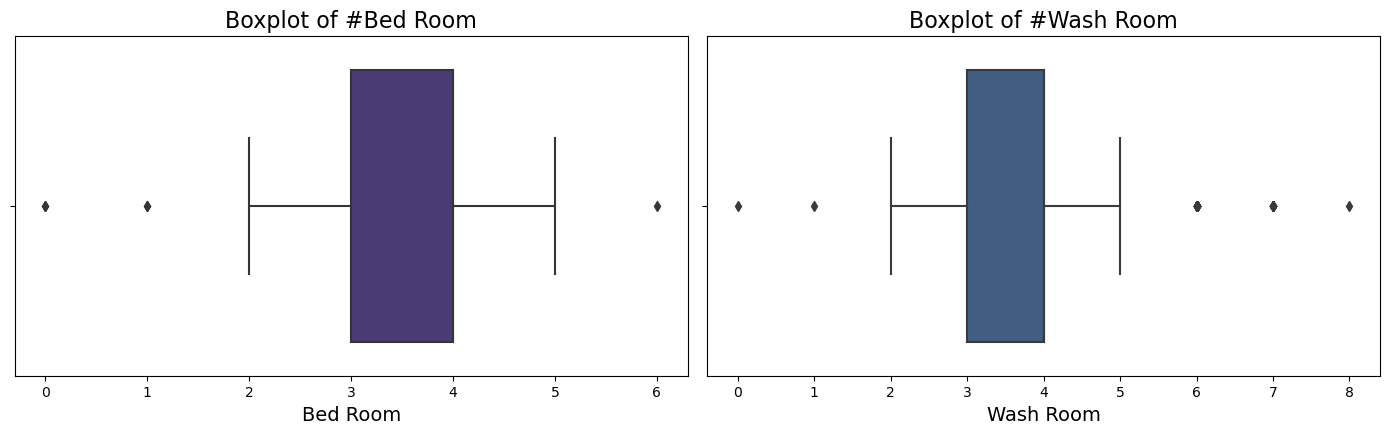

In [30]:
numerical_columns = ['Bed Room', 'Wash Room']

color_palette = sns.color_palette('viridis')

plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(housingData[column], bins=20, color=color_palette[i-1])
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=housingData[column], color=color_palette[i-1])
    plt.title(f'Boxplot of #{column}', fontsize=16)
    plt.xlabel(column, fontsize=14)

plt.tight_layout()
plt.show()


# Bivariate Analysis

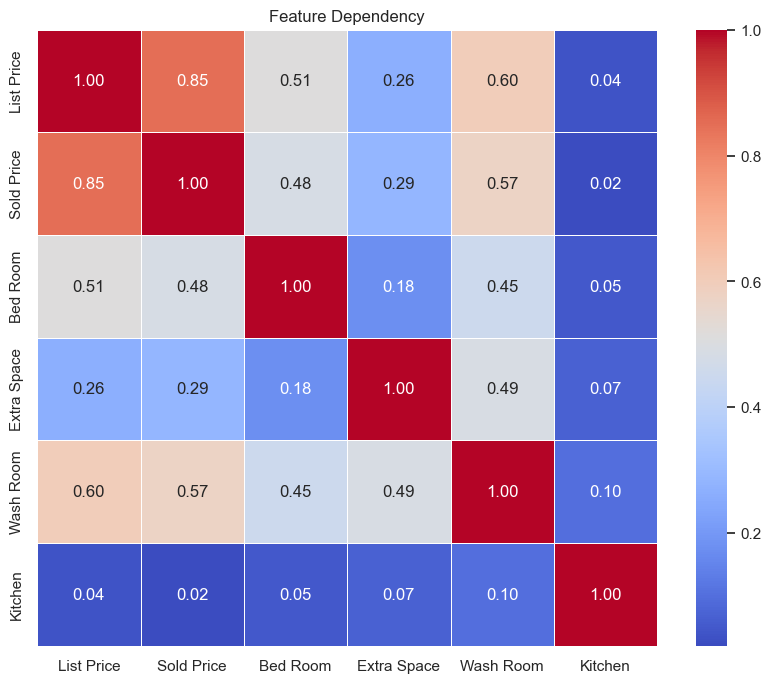

In [38]:
numerical_columns = ['List Price', 'Sold Price', 'Bed Room', 'Extra Space', 'Wash Room', 'Kitchen']

correlation_matrix = housingData[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Dependency')
plt.show()

# Bivariate Analysis For Numerical And Numericals

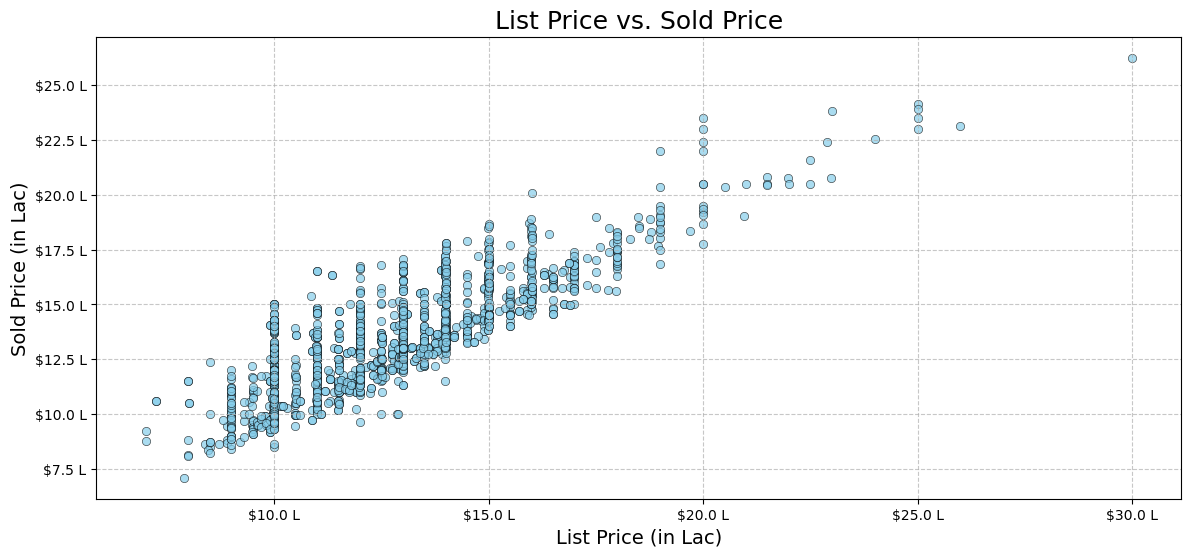

In [31]:
# Scatter Plot of List Price vs. Sold Price

plt.figure(figsize=(14, 6))

scatterplot = sns.scatterplot(x='List Price', y='Sold Price', data=housingData, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('List Price vs. Sold Price', fontsize=18)
plt.xlabel('List Price (in Lac)', fontsize=14)
plt.ylabel('Sold Price (in Lac)', fontsize=14)

lakh_formatter = mtick.FuncFormatter(lambda x, _: f'${x/100000:.1f} L')
scatterplot.xaxis.set_major_formatter(lakh_formatter)
scatterplot.yaxis.set_major_formatter(lakh_formatter)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Bivariate Analysis For Numerical And Categorical

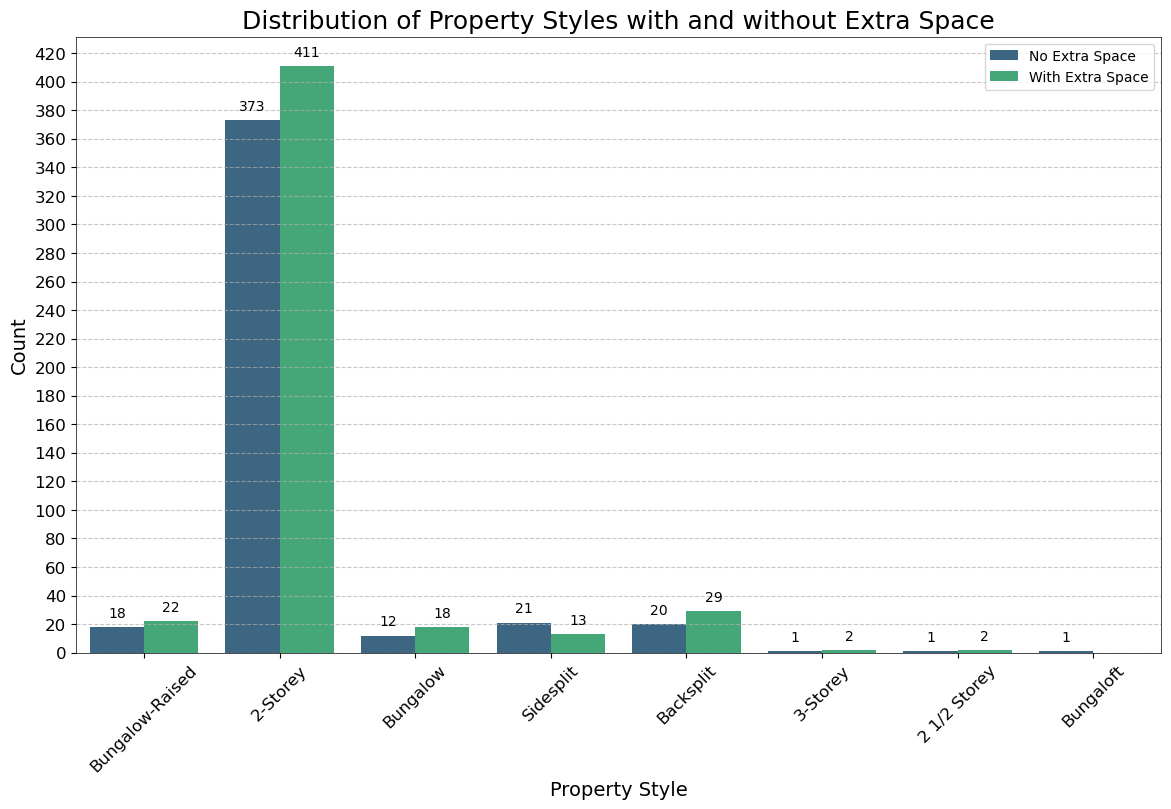

In [32]:
# Distribution of Property Styles with and without Extra Space

plt.figure(figsize=(14, 8))

ax = sns.countplot(x='Style', hue='Extra Space', data=housingData, palette='viridis', hue_order=[0, 1])

plt.title('Distribution of Property Styles with and without Extra Space', fontsize=18)
plt.xlabel('Property Style', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend( labels=['No Extra Space', 'With Extra Space'], loc='upper right')

plt.xticks(rotation=45, ha='center', fontsize=12)

plt.yticks(range(0, 440, 20), fontsize=12)

for p in ax.patches:
    count = p.get_height()
    if not pd.isna(count):
        ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')

plt.show()

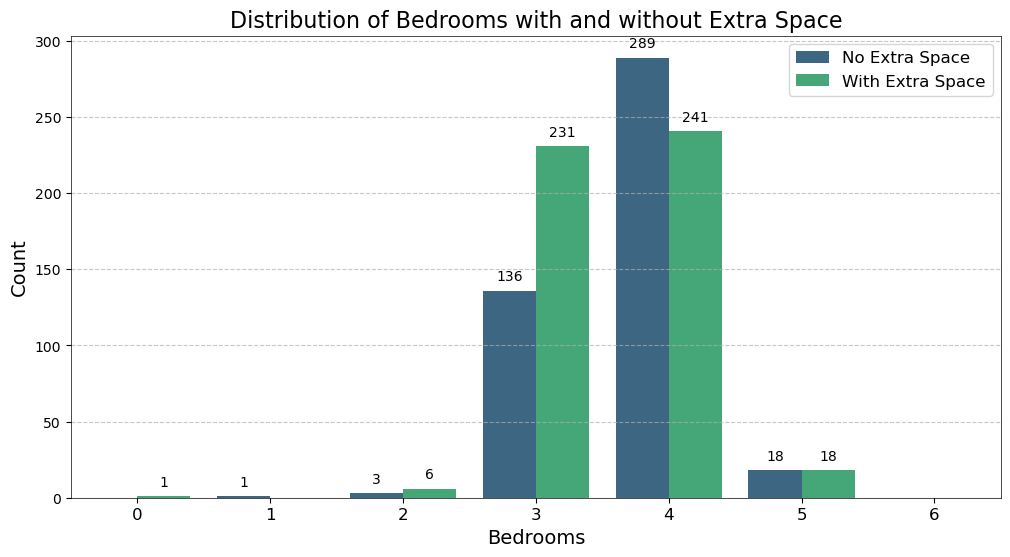

In [33]:
# Distribution of Bedrooms with and without Extra Space

plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Bed Room', hue='Extra Space', data=housingData, palette='viridis', hue_order=[0, 1])

legend_labels = ['No Extra Space', 'With Extra Space']
plt.legend(labels=legend_labels, loc='upper right', fontsize=12)

for p in ax.patches:
    count = p.get_height()
    if not pd.isna(count):
        ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.title('Distribution of Bedrooms with and without Extra Space', fontsize=16)

plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')

plt.show()


In [34]:
housingData['Contract Month'] = housingData['Contract Date'].dt.month
housingData['Contract Year'] = housingData['Contract Date'].dt.year
housingData['Sold Month'] = housingData['Sold Date'].dt.month
housingData['Sold Year'] = housingData['Sold Date'].dt.year

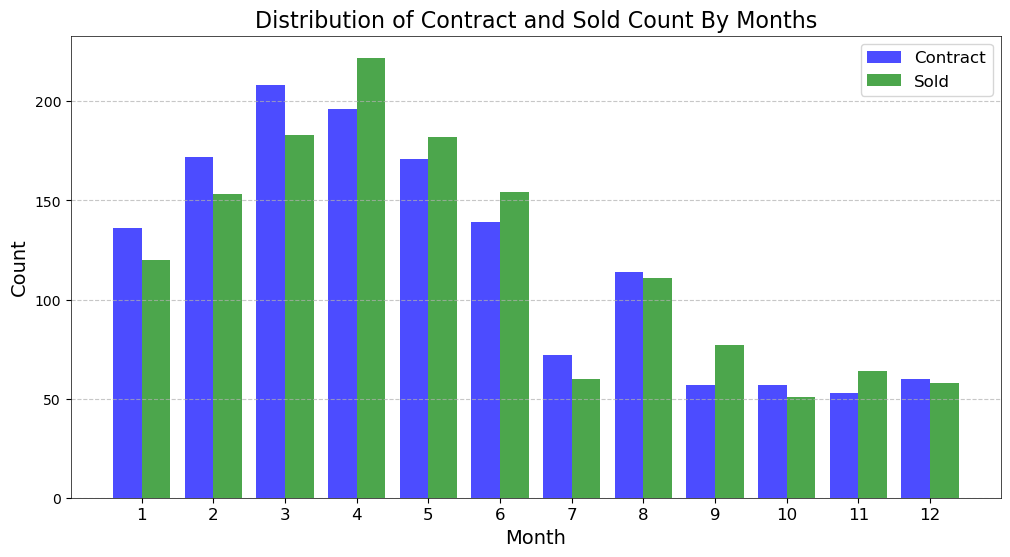

In [35]:
# Distribution of Contract and Sold Count By Months

months_df = pd.DataFrame({
    'Month': sorted(housingData['Contract Month'].unique()),  # Unique months from Contract Month
    'Contract Count': housingData['Contract Month'].value_counts().sort_index(),
    'Sold Count': housingData['Sold Month'].value_counts().sort_index()
})

plt.figure(figsize=(12, 6))

plt.bar(months_df['Month'] - 0.2, months_df['Contract Count'], width=0.4, label='Contract', color='blue', alpha=0.7)

plt.bar(months_df['Month'] + 0.2, months_df['Sold Count'], width=0.4, label='Sold', color='green', alpha=0.7)

plt.title('Distribution of Contract and Sold Count By Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)

plt.xticks(months_df['Month'], [str(month) for month in months_df['Month']], rotation=0, ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')

plt.show()

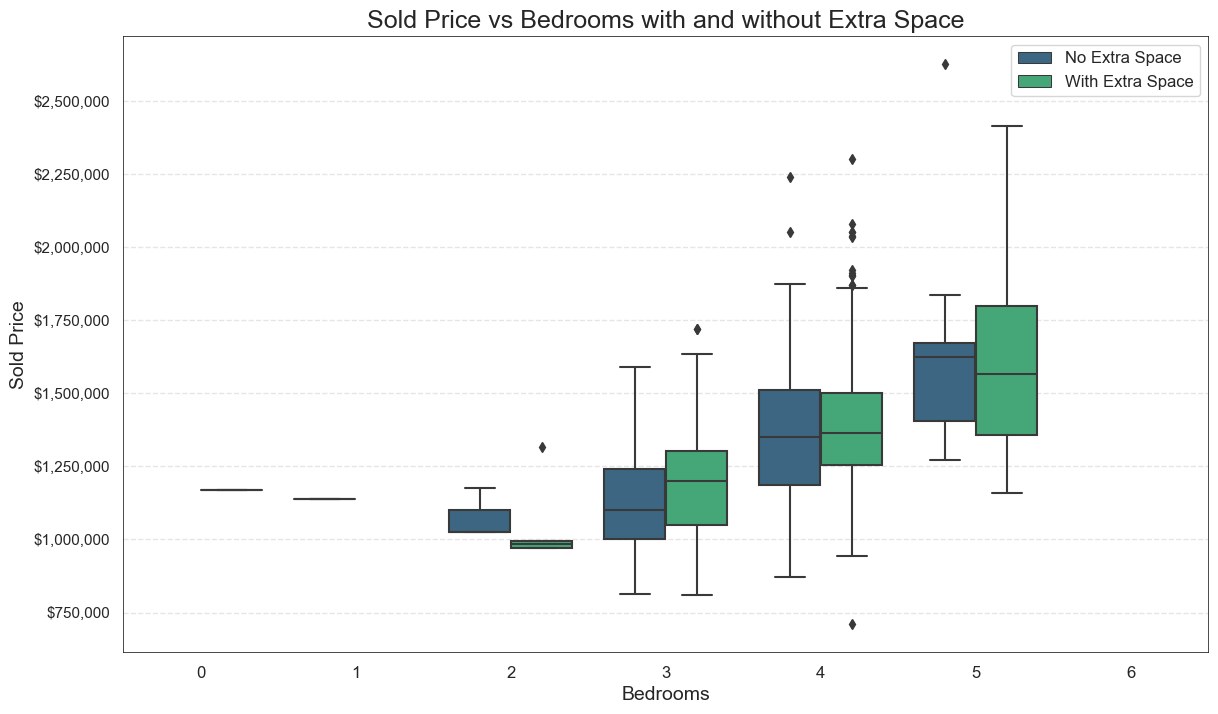

In [36]:
# Sold Price vs Bedrooms with and without Extra Space

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.boxplot(x='Bed Room', y='Sold Price', hue='Extra Space', data=housingData, palette='viridis', hue_order=[0, 1], linewidth=1.5)

plt.title('Sold Price vs Bedrooms with and without Extra Space', fontsize=18)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Sold Price', fontsize=14)
plt.legend(labels=['No Extra Space', 'With Extra Space'], loc='upper right', fontsize=12)

currency_formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(currency_formatter)

plt.xticks(rotation=0, ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')

plt.show()

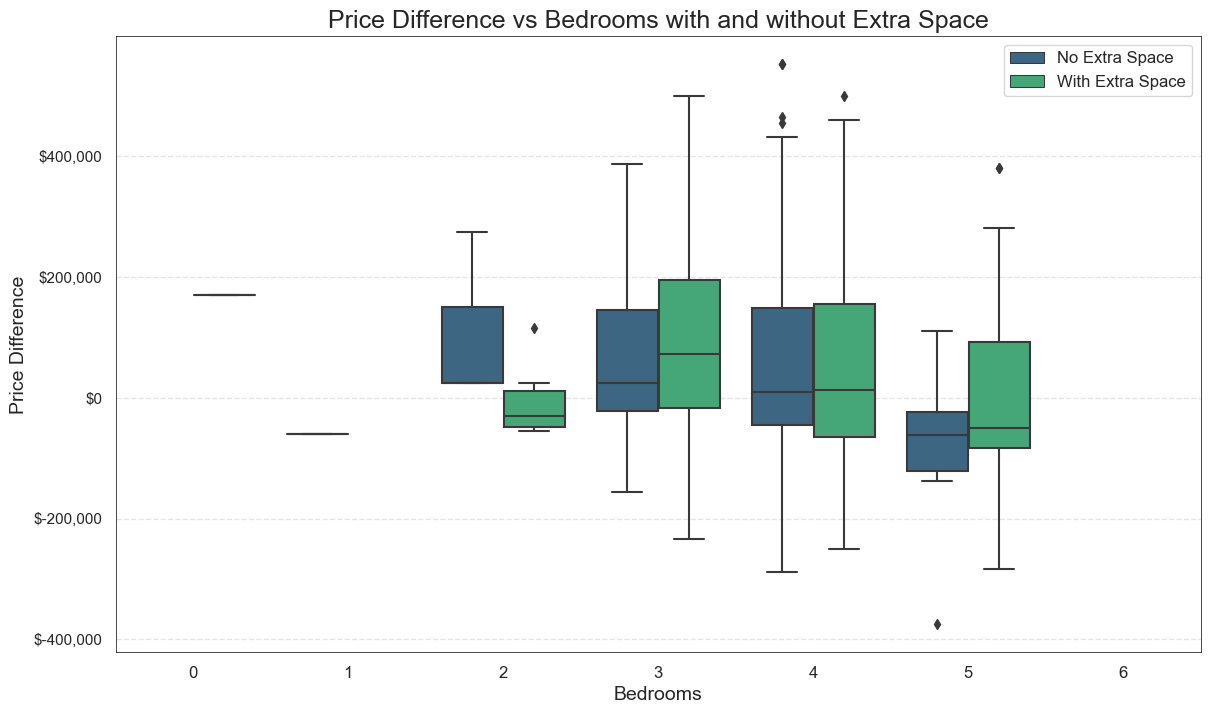

In [37]:
# Price Difference vs Bedrooms with and without Extra Space

housingData['Price Difference'] = housingData['Sold Price'] - housingData['List Price']

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.boxplot(x='Bed Room', y='Price Difference', hue='Extra Space', hue_order=[0, 1], data=housingData, palette='viridis', linewidth=1.5)
plt.title('Price Difference vs Bedrooms with and without Extra Space', fontsize=18)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price Difference', fontsize=14)
plt.legend(labels=['No Extra Space', 'With Extra Space'], loc='upper right', fontsize=12)

currency_formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(currency_formatter)

plt.xticks(rotation=0, ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')

plt.show()